# Data Exploration

## Purpose:
The purpose of this notebook is to explore the data generated by data_scraper.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv("../data/wiki_movie_plots_deduped.csv")
print("Shape: %s" %str(df.shape))
df.head()

Shape: (34886, 8)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
# Count Null values
df.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

The columns *Release Year*, *Title*, *Origin/Ethnicity*, *Wiki Page*, and *Plot* are non-null across all movies. Note, the data_scraper.py code filters out rows where *Title* and/or *Plot* are missing

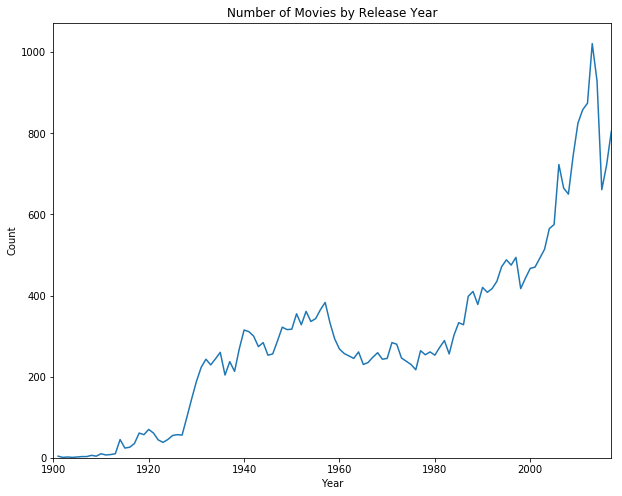

In [4]:
# Count movies by 'Release Year'
cnt = df.groupby("Release Year")["Title"].count()

plt.figure(figsize=(10,8))
plt.title("Number of Movies by Release Year")
plt.plot(cnt)
plt.xlim([1900, 2017])
y_min, y_max = plt.ylim()
plt.ylim([0, y_max])
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In general, the number of movies is increasing over time.  This can be attributed to both the increase in movies released over time and the increased availability of Wikipedia pages for more recent movies.

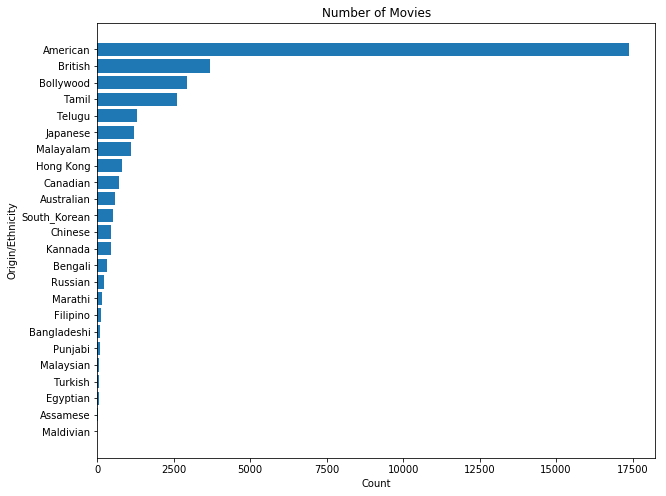

In [5]:
# Count movies by 'Origin/Ethnicity'
cnt = df.groupby("Origin/Ethnicity")["Title"].count().sort_values()

plt.figure(figsize=(10,8))
plt.title("Number of Movies")
ind = np.arange(cnt.shape[0])
plt.barh(ind, cnt)
plt.ylabel("Origin/Ethnicity")
plt.xlabel("Count")
plt.yticks(ind, cnt.index)
plt.show()

Approximately half of the movies in this dataset are American

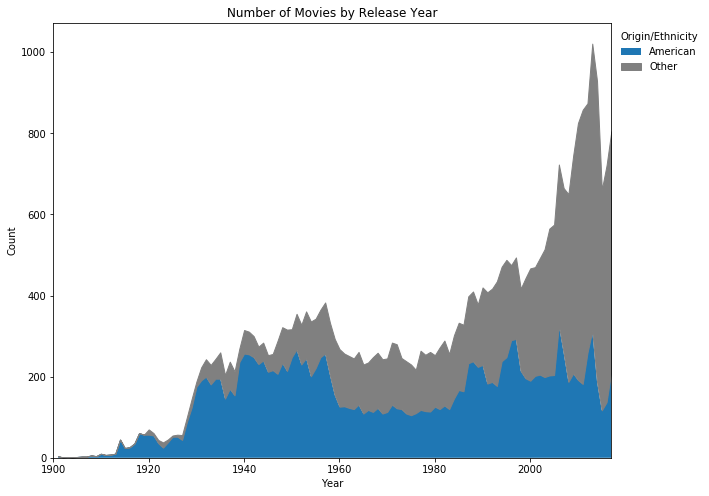

In [6]:
# Count movies by 'Release Year'
# US Only
cnt_us = df[df["Origin/Ethnicity"] == "American"].groupby("Release Year")["Title"].count()

# All
cnt = df.groupby("Release Year")["Title"].count()

plt.figure(figsize=(10,8))
plt.fill_between(cnt_us.index, 0, cnt_us, label="American")

plt.fill_between(cnt_us.index, cnt_us, cnt, color="grey", label="Other")

plt.title("Number of Movies by Release Year")
plt.xlim([1900, 2017])
y_min, y_max = plt.ylim()
plt.ylim([0, y_max])

plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(frameon=False, loc=2, bbox_to_anchor=(1,1), title="Origin/Ethnicity")
plt.show()

Around 1960, the number of non-American movies begins to exceed the number of American movies in this dataset.

In [7]:
df.groupby(["Origin/Ethnicity", "Director"])["Title"].count().sort_values(ascending=False)

Origin/Ethnicity  Director                  
Bollywood         Unknown                       338
American          Unknown                       232
Japanese          Unknown                       164
South_Korean      Unknown                        93
Australian        Unknown                        88
American          Michael Curtiz                 79
                  Hanna-Barbera                  77
                  Lloyd Bacon                    66
                  Jules White                    63
                  John Ford                      58
                  Allan Dwan                     57
                  Norman Taurog                  56
Tamil             Unknown                        56
American          William A. Seiter              56
                  Richard Thorpe                 55
                  Mervyn LeRoy                   54
                  Gordon Douglas                 51
                  Raoul Walsh                    51
                  A

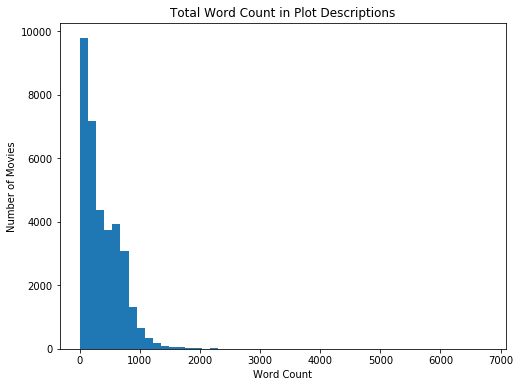

Mean Word Count: 372
Median Word Count: 284
Maximum Word Count: 6752


In [8]:
word_count = df["Plot"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
plt.title("Total Word Count in Plot Descriptions")
plt.hist(word_count, bins=50)
plt.xlabel("Word Count")
plt.ylabel("Number of Movies")
plt.show()

print("Mean Word Count: %i" %word_count.mean())
print("Median Word Count: %i" %word_count.median())
print("Maximum Word Count: %i" %word_count.max())

The word count distribution of the plot descriptions has a very long upper tail

## Text Exploration

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 3), min_df = 10)

X_tfidf = tfidf.fit_transform(df["Plot"])

f = np.array(tfidf.get_feature_names())

In [10]:
def get_movie_terms(x, top_n=50):
    """
    Return top word ranked by Tf-Idf for input movie
    
    Params:
    ------
    x = Movie title
    top_n = Number of terms to return
    
    Returns:
    -------
    List of top ranked terms (length = top_n)
    
    """
    
    try: 
        i = df.query("Title == @x").index[0] 
        print(df.iloc[i]["Title"]) 
        print("Director: %s" %df.iloc[i]["Director"]) 
        print("Genre: %s" %df.iloc[i]["Genre"]) 
        print("\nTop Terms") 
        sorted_indices = np.array(X_tfidf[i].todense()).argsort()
        print(f[sorted_indices].flatten()[::-1][:top_n])
        print("\n")
    except IndexError:
        print("Movie Title Not Found")

In [11]:
get_movie_terms("Get Out")

Get Out
Director: Jordan Peele
Genre: horror

Top Terms
['chris' 'rose' 'georgina' 'missy' 'logan' 'rod' 'walter' 'jeremy' 'black'
 'dean' 'white' 'hudson' 'armitage' 'white people' 'strange behavior'
 'sunken' 'awakens' 'hypnosis' 'deer' 'estate' 'roman' 'flash' 'phone'
 'possessed' 'chair' 'photo' 'house' 'jim' 'family' 'goes' 'hypnotherapy'
 'explains family' 'strapped chair' 'strange' 'behavior' 'antlers'
 'people arrive' 'chris finds' 'car' 'finds photos' 'begins strangle'
 'chris chris' 'people' 'chris meets' 'neurosurgeon' 'comes collect'
 'rifle shoots' 'contradicting' 'car hits' 'report incident']




In [12]:
get_movie_terms("The Shape of Water")

The Shape of Water
Director: Guillermo del Toro
Genre: fantasy, horror, romance, sci-fi, thriller

Top Terms
['creature' 'giles' 'zelda' 'handlers' 'canal' 'apartment' 'plans release'
 'hoyt' 'wounds' 'arm' 'slashes' 'heals' 'release' 'cinema' 'water'
 'discovers' 'rendezvous' 'soviet' 'american' 'study' 'plans' 'neck'
 'bond' 'recover' 'date approaches' 'war friends' 'salt water'
 'orphaned child' 'cleaning woman' 'deep water' 'wounded arm' 'balding'
 'open reveal' 'river' '36 hours' 'form close' 'euthanize' 'soviet spy'
 'voice narration' 'receives mysterious' 'esposito' 'pandora'
 'arrives attacks' 'illustrator' 'throat killing' 'help free'
 'secret government' 'devouring' 'dimitri' 'lives apartment']




In [13]:
get_movie_terms("Dunkirk")

Dunkirk
Director: Leslie Norman
Genre: world war ii

Top Terms
['tubby' 'foreman' 'holden' 'france' 'beaches' '1940' 'phoney' 'dunkirk'
 'john mills' 'german' 'john' 'lorry' 'mills' 'corporal' 'soldiers'
 'british' 'private' 'civilian' 'germans' 'men' 'troops' 'rest' 'royal'
 'war' 'french' 'england' 'viscount' 'stragglers' 'british french'
 'frazer' 'germans invade' 'attack leaving' 'bernard lee' 'ferrying'
 'camp' 'killed german' 'expeditionary' 'repelling' 'platoon leader'
 'german air' 'strafing' 'return camp' 'debacle' 'boat' 'air attack'
 'hit face' 'rouse' 'admiralty' 'french soldiers' 'tens thousands']




In [14]:
df["Genre"].value_counts()

unknown                                                  6083
drama                                                    5964
comedy                                                   4379
horror                                                   1167
action                                                   1098
thriller                                                  966
romance                                                   923
western                                                   865
crime                                                     568
adventure                                                 526
musical                                                   467
crime drama                                               464
romantic comedy                                           461
science fiction                                           418
film noir                                                 345
mystery                                                   310
war     

In [17]:
df["Origin/Ethnicity"].value_counts()

American        17377
British          3670
Bollywood        2931
Tamil            2599
Telugu           1311
Japanese         1188
Malayalam        1095
Hong Kong         791
Canadian          723
Australian        576
South_Korean      522
Chinese           463
Kannada           444
Bengali           306
Russian           232
Marathi           141
Filipino          128
Bangladeshi        87
Punjabi            84
Turkish            70
Malaysian          70
Egyptian           67
Assamese            9
Maldivian           2
Name: Origin/Ethnicity, dtype: int64